In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
x=df.values

In [4]:
x

array([[    2,     3, 12669, ...,   214,  2674,  1338],
       [    2,     3,  7057, ...,  1762,  3293,  1776],
       [    2,     3,  6353, ...,  2405,  3516,  7844],
       ...,
       [    2,     3, 14531, ...,   437, 14841,  1867],
       [    1,     3, 10290, ...,  1038,   168,  2125],
       [    1,     3,  2787, ...,    65,   477,    52]], dtype=int64)

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [6]:
scores=[]
for k in range(2,11):
    gmm=GaussianMixture(n_components=k)
    gmm.fit(x) #antrenarea algoritmului
    y_pred=gmm.predict(x)
    scores.append(silhouette_score(x,y_pred))

In [7]:
scores

[0.27624713050297744,
 -0.06732057916843202,
 -0.034621196113609184,
 0.1845523565174943,
 0.1777832627934243,
 0.012723759630621924,
 0.020826509092419513,
 -0.014938331443495118,
 -0.05852392938326291]

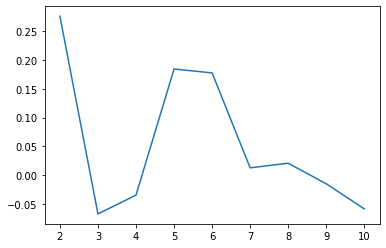

In [8]:
plt.plot(range(2,11), scores)

In [16]:
gmm=GaussianMixture(n_components=5)

In [17]:
gmm.fit(x)

GaussianMixture(n_components=5)

In [18]:
y_pred=gmm.predict(x)

In [19]:
y_pred #fiecare numar reprezinta un oarecare claster

array([3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 1, 3, 1,
       0, 3, 3, 3, 1, 1, 3, 0, 0, 1, 1, 0, 1, 3, 0, 3, 3, 4, 0, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3,
       1, 3, 0, 1, 0, 0, 0, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 0,
       0, 0, 1, 1, 3, 0, 3, 1, 3, 1, 1, 1, 3, 3, 3, 4, 1, 1, 3, 3, 3, 3,
       1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 3, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       0, 0, 0, 1, 1, 4, 1, 0, 1, 0, 1, 1, 3, 3, 0, 1, 1, 3, 1, 1, 0, 3,
       1, 1, 3, 3, 0, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 2, 3, 1,
       2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 0, 0, 1, 1, 1, 4, 4, 1, 1, 2, 1,
       3, 0, 3, 0, 3, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 3, 1, 3, 0, 0, 4, 0,
       1, 1, 1, 0, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3,

In [20]:
gmm.means_ #valorile medii

array([[1.00000000e+00, 2.64340219e+00, 2.03314115e+04, 6.41484370e+03,
        5.80381818e+03, 7.36313453e+03, 6.87167283e+02, 2.99584723e+03],
       [1.00000000e+00, 2.50683703e+00, 9.08358041e+03, 2.36475582e+03,
        3.25953164e+03, 2.29308653e+03, 8.26025567e+02, 8.27971632e+02],
       [1.12507485e+00, 1.37512044e+00, 1.82601271e+04, 1.09321623e+03,
        1.66821048e+03, 3.08555958e+03, 2.09934632e+02, 1.16309722e+03],
       [2.00000000e+00, 2.61702128e+00, 8.84816312e+03, 1.07859220e+04,
        1.64191631e+04, 1.58235461e+03, 7.31870922e+03, 1.74114894e+03],
       [1.00000000e+00, 2.42857059e+00, 6.84097427e+04, 7.29886997e+03,
        8.16101088e+03, 1.13484289e+04, 1.40943047e+03, 3.06100096e+03]])

In [21]:
cluster_table=pd.DataFrame(gmm.means_,columns=df.columns)

In [22]:
cluster_table

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.000000,2.643402,20331.411527,6414.843702,5803.818175,7363.134534,687.167283,2995.847231
1,1.000000,2.506837,9083.580415,2364.755818,3259.531645,2293.086529,826.025567,827.971632
2,1.125075,1.375120,18260.127073,1093.216235,1668.210483,3085.559576,209.934632,1163.097215
3,2.000000,2.617021,8848.163121,10785.921986,16419.163121,1582.354610,7318.709220,1741.148936
4,1.000000,2.428571,68409.742693,7298.869973,8161.010884,11348.428878,1409.430470,3061.000963


In [23]:
cluster_table.std()

Channel                 0.436602
Region                  0.532009
Fresh               24828.616131
Milk                 3912.207232
Grocery              5785.738467
Frozen               4137.307344
Detergents_Paper     2953.929225
Delicassen           1030.727505
dtype: float64

In [27]:
cluster_table[['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.000000,2.643402,20331.411527,6414.843702,5803.818175,7363.134534,687.167283,2995.847231
1,1.000000,2.506837,9083.580415,2364.755818,3259.531645,2293.086529,826.025567,827.971632
2,1.125075,1.375120,18260.127073,1093.216235,1668.210483,3085.559576,209.934632,1163.097215
3,2.000000,2.617021,8848.163121,10785.921986,16419.163121,1582.354610,7318.709220,1741.148936
4,1.000000,2.428571,68409.742693,7298.869973,8161.010884,11348.428878,1409.430470,3061.000963
